In [26]:
library(tidyverse)
source("../scripts/assembly-map.r")

In [30]:
assembly_index(1000)

[1] 12

In [32]:
all_data = read.csv("../data/raw//1.0_1000.0_1.0_10.0_.csv")
head(all_data)

,time,variable,value
,<dbl>,<chr>,<dbl>
1,56,variance_lengths,16.91723
2,56,molecule_count,307.00000
3,56,5,9.00000
4,56,12,3.00000
5,56,24,2.00000
6,56,8,5.00000


In [33]:
averages_data = all_data %>% 
    filter(variable %in% c("variance_lengths", "average_lengths", "molecule_count"))
head(averages_data)

,time,variable,value
,<dbl>,<chr>,<dbl>
1,56,variance_lengths,16.917226
2,56,molecule_count,307.000000
3,56,average_lengths,3.257329
4,35,variance_lengths,32.862251
5,35,molecule_count,294.000000
6,35,average_lengths,3.401361


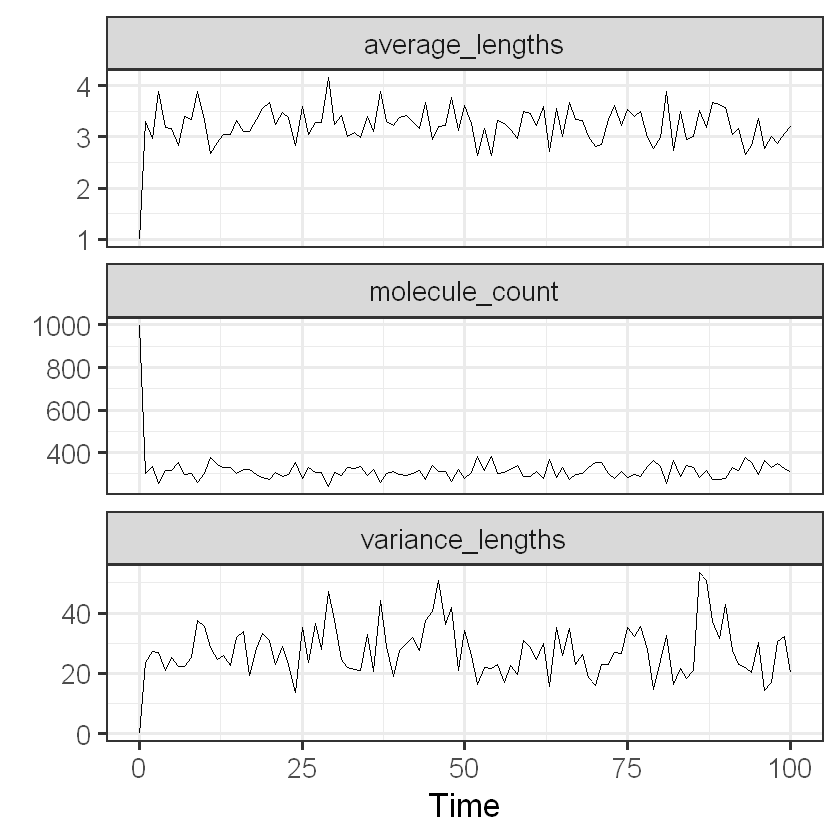

In [34]:
ggplot(averages_data, aes(x = time, y =value)) + 
    geom_line() + 
    labs(x = "Time", y = element_blank()) + 
    facet_wrap(~variable, ncol = 1, scales = "free_y") + 
    theme_bw(base_size = 20)

In [36]:
unique(all_data$variable)

[1] "variance_lengths" "molecule_count"   "5"                "12"              
 [5] "24"               "8"                "1"                "19"              
 [9] "6"                "11"               "9"                "14"              
[13] "3"                "7"                "25"               "4"               
[17] "13"               "15"               "2"                "10"              
[21] "18"               "average_lengths"  "16"               "20"              
[25] "17"               "22"               "43"               "31"              
[29] "39"               "51"               "23"               "32"              
[33] "26"               "56"               "30"               "80"              
[37] "27"               "49"               "45"               "29"              
[41] "33"               "48"               "21"               "47"              
[45] "69"               "40"               "35"               "97"              
[49] "66"               "34"               "28"               "38"              
[53] "57"               "36"               "44"               "59"              
[57] "55"               "37"               "63"               "41"              
[61] "53"               "54"               "46"               "58"              
[65] "61"               "42"               "52"               "50"              
[69] "65"               "102"              "70"               "96"

In [37]:
individual_data = all_data %>% filter(!variable %in% c("variance_lengths", "average_lengths", "molecule_count"))

In [38]:
individual_data["AI"] <- assembly_index(as.numeric(individual_data$variable))

In [40]:
AI_timeseries <- individual_data %>% group_by(time, AI) %>% summarise(total = sum(value))

`summarise()` has grouped output by 'time'. You can override using the `.groups` argument.



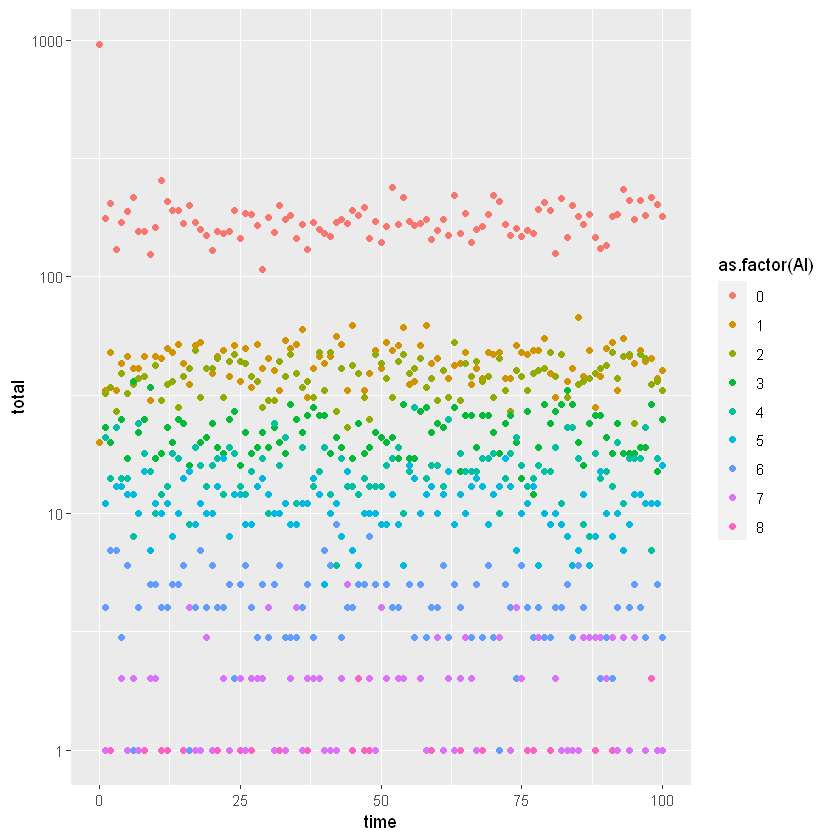

In [42]:
ggplot(AI_timeseries) + geom_point(aes(x = time, y = total, color = as.factor(AI))) + scale_y_log10()

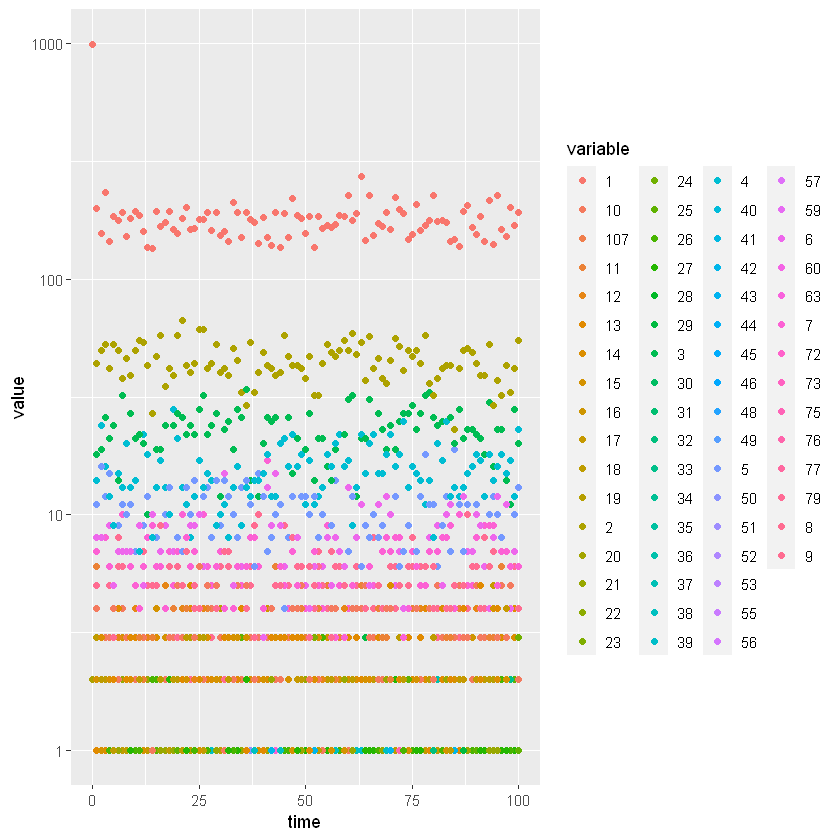

In [56]:
ggplot(individual_data) + geom_point(aes(x = time, y = value, color = variable)) + scale_y_log10()

In [57]:
twice_observed_data = individual_data[individual_data$value > 1,]

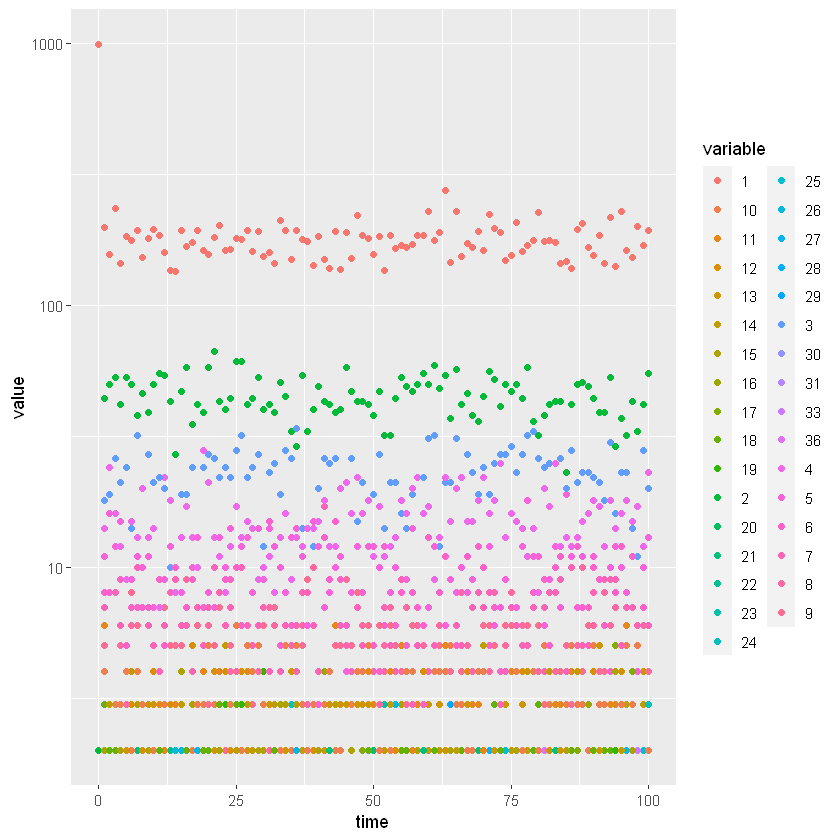

In [58]:
ggplot(twice_observed_data) + geom_point(aes(x = time, y = value, color = variable)) + scale_y_log10()